<a href="https://colab.research.google.com/github/xmrcl0/7600064/blob/main/project1/projetc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1

## Parte A
Ler os 20 arquivos fornecidos, cada um a ser tratado como o vetor de atributo de
um respectivo objeto, e realizar visualizações como sequência de valores e como histogramas. Obter também algumas estatísticas dos valores em cada arquivo. A partir das informações assim obtidas, tentar identificar grupos entre os arquivos e propor um possível respectivo modelo capaz de gerar novos padrões com características semelhantes aos originais. Comparar visualizações e estatísticas dos sinais originais e os obtidos pelo modelo proposto, verificando se são semelhantes ou não. Visualizar os dois tipos de sinais modelados também como imagens em níveis de cinza de 200 X 200 pixels.

In [182]:
# Read files
import pandas as pd

url = "https://raw.githubusercontent.com/xmrcl0/7600064/main/project1/data/"

files=['dados_1', 'dados_2', 'dados_3', 'dados_4', 'dados_5',\
       'dados_6', 'dados_7', 'dados_8', 'dados_9', 'dados_10',\
       'dados_11', 'dados_12', 'dados_13', 'dados_14', 'dados_15',\
       'dados_16', 'dados_17', 'dados_18', 'dados_19', 'dados_20']

frame = [ pd.read_csv(url + f, delimiter=" ") for f in files ]
frame

[            x
 1   -0.299786
 2    0.185219
 3    0.416876
 4   -0.215601
 5   -0.395350
 ..        ...
 496 -0.099463
 497 -0.376734
 498  0.458503
 499  0.158737
 500 -0.130370
 
 [500 rows x 1 columns],             x
 1    0.009716
 2    0.466368
 3   -0.325726
 4   -0.339052
 5    0.003940
 ..        ...
 496  0.173080
 497 -0.343770
 498 -0.128098
 499  0.362082
 500 -0.458581
 
 [500 rows x 1 columns],             x
 1    0.431900
 2    0.356442
 3    0.067605
 4    0.087522
 5    0.492537
 ..        ...
 496 -0.178613
 497 -0.457191
 498  0.458411
 499 -0.424313
 500  0.421946
 
 [500 rows x 1 columns],             x
 1    0.304824
 2    0.373700
 3    0.373948
 4   -0.248585
 5   -0.145185
 ..        ...
 496  0.216586
 497  0.066157
 498 -0.299457
 499 -0.054013
 500 -0.198928
 
 [500 rows x 1 columns],             x
 1    0.182374
 2    0.015946
 3    0.156040
 4    0.398459
 5   -0.292421
 ..        ...
 496 -0.116188
 497 -0.215743
 498 -0.395800
 499  0.097307
 500 -0.103

In [183]:
# Create a dataframe with frame
df = pd.concat(frame, axis=1)
df.head()

,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x
1,-0.299786,0.009716,0.431900,0.304824,0.182374,0.441248,0.060216,0.360217,-0.310677,-0.049721,-0.964961,-0.901943,1.430848,0.061332,0.250371,-0.420767,-0.700540,1.320953,0.431348,0.242801
2,0.185219,0.466368,0.356442,0.373700,0.015946,0.412779,0.296817,0.140874,0.395670,-0.143049,-0.534426,0.302538,0.751639,0.956654,-0.871101,0.049740,-0.988480,-1.716301,-0.852101,-1.683024
3,0.416876,-0.325726,0.067605,0.373948,0.156040,0.449142,0.185673,-0.431644,0.281801,-0.165599,0.513940,0.760448,-0.074032,-0.788282,0.766369,0.100789,0.646918,2.062422,-0.749985,-0.965701
4,-0.215601,-0.339052,0.087522,-0.248585,0.398459,0.225595,-0.092601,-0.458185,0.255904,-0.275065,-0.036265,-0.493600,1.441648,0.375488,0.077286,0.656457,-0.094634,0.540196,-0.413256,1.634112
5,-0.395350,0.003940,0.492537,-0.145185,-0.292421,-0.073513,-0.015023,-0.039520,0.278937,0.400528,-1.483185,-1.295692,-1.280120,1.288628,-0.769761,-0.281038,-1.844840,-0.329664,-0.862924,0.768298


In [184]:
# Rename the columns with files names
df.columns = files
df.head()

,dados_1,dados_2,dados_3,dados_4,dados_5,dados_6,dados_7,dados_8,dados_9,dados_10,dados_11,dados_12,dados_13,dados_14,dados_15,dados_16,dados_17,dados_18,dados_19,dados_20
1,-0.299786,0.009716,0.431900,0.304824,0.182374,0.441248,0.060216,0.360217,-0.310677,-0.049721,-0.964961,-0.901943,1.430848,0.061332,0.250371,-0.420767,-0.700540,1.320953,0.431348,0.242801
2,0.185219,0.466368,0.356442,0.373700,0.015946,0.412779,0.296817,0.140874,0.395670,-0.143049,-0.534426,0.302538,0.751639,0.956654,-0.871101,0.049740,-0.988480,-1.716301,-0.852101,-1.683024
3,0.416876,-0.325726,0.067605,0.373948,0.156040,0.449142,0.185673,-0.431644,0.281801,-0.165599,0.513940,0.760448,-0.074032,-0.788282,0.766369,0.100789,0.646918,2.062422,-0.749985,-0.965701
4,-0.215601,-0.339052,0.087522,-0.248585,0.398459,0.225595,-0.092601,-0.458185,0.255904,-0.275065,-0.036265,-0.493600,1.441648,0.375488,0.077286,0.656457,-0.094634,0.540196,-0.413256,1.634112
5,-0.395350,0.003940,0.492537,-0.145185,-0.292421,-0.073513,-0.015023,-0.039520,0.278937,0.400528,-1.483185,-1.295692,-1.280120,1.288628,-0.769761,-0.281038,-1.844840,-0.329664,-0.862924,0.768298


In [185]:
df.describe()

,dados_1,dados_2,dados_3,dados_4,dados_5,dados_6,dados_7,dados_8,dados_9,dados_10,dados_11,dados_12,dados_13,dados_14,dados_15,dados_16,dados_17,dados_18,dados_19,dados_20
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.003232,-0.003458,0.014871,-0.021507,-0.005901,0.008580,0.001191,-0.001377,0.020742,0.001219,-0.071818,-0.036625,0.055967,0.042742,-0.046774,0.013081,-0.067730,0.058912,-0.125249,-0.014661
std,0.295128,0.289296,0.297516,0.280521,0.280787,0.284212,0.286473,0.296507,0.299617,0.283300,0.992690,1.004047,0.974367,1.101496,0.994017,0.999989,0.988127,1.004140,0.980748,1.049023
min,-0.499766,-0.495404,-0.495708,-0.494718,-0.499125,-0.494152,-0.499257,-0.498100,-0.499513,-0.499208,-3.320545,-4.149454,-2.903550,-3.437106,-3.240244,-3.178576,-2.888680,-2.525039,-2.825354,-3.483882
25%,-0.252903,-0.256565,-0.259124,-0.249021,-0.246871,-0.226192,-0.242648,-0.252961,-0.249894,-0.231654,-0.784293,-0.712106,-0.585631,-0.770160,-0.712956,-0.666233,-0.723650,-0.656101,-0.809975,-0.750860
50%,-0.026570,-0.007473,0.012626,-0.043456,-0.025385,0.017210,0.010728,-0.002784,0.018246,0.001744,-0.065432,-0.072290,0.010895,0.089113,-0.031212,0.066499,-0.109524,0.055689,-0.101911,-0.053230
75%,0.266708,0.249251,0.280809,0.219023,0.243421,0.249371,0.240428,0.261395,0.296564,0.241576,0.628781,0.675807,0.725970,0.774522,0.632961,0.659957,0.554967,0.720960,0.544789,0.691652
max,0.495341,0.497015,0.499329,0.498104,0.498088,0.499037,0.499778,0.498735,0.499228,0.497105,2.697991,2.510935,3.125179,3.251335,2.907237,2.958744,2.940906,3.087863,2.329836,2.711755


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39468a7350>,
      dtype=object)

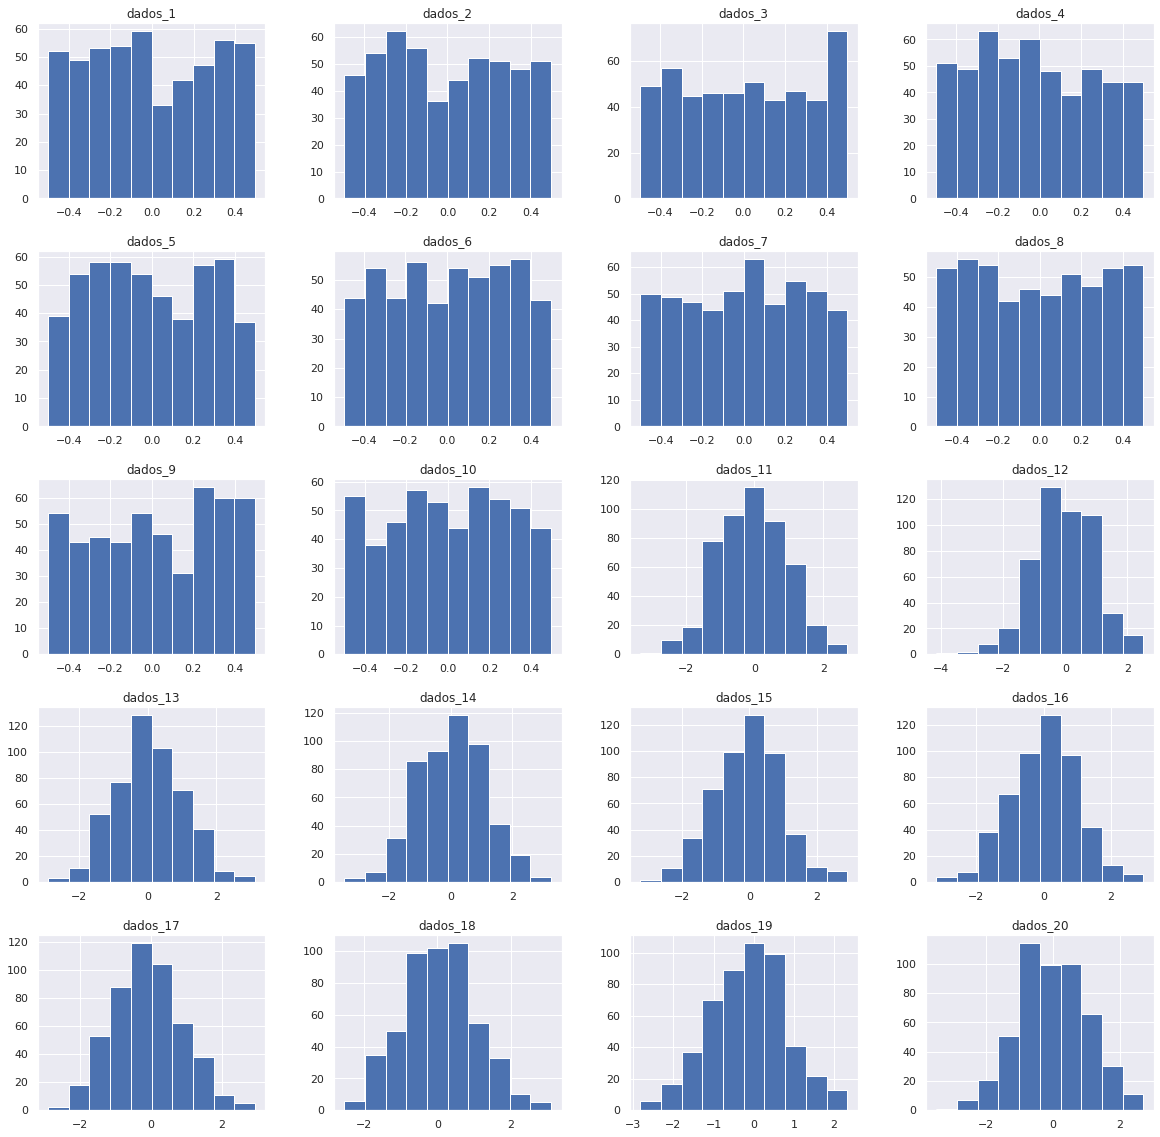

In [186]:
# Create histograms 
df.hist(figsize=(20, 20))

## Parte B
Implementar programas para implementação dos autômatos na Figura 6, obtendo
visualizações semelhantes às da Figura 7. Combinar os autômatos da Figura 6 de forma a obter resultados semelhantes aos da Figura 10. Obter padrões geométricos como os das Figuras 11 e 12. Obter as distribuições de números de 1’s gerados pelos autômatos da Figura 6, de forma compatível com os resultados da Figura 13.

In [187]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


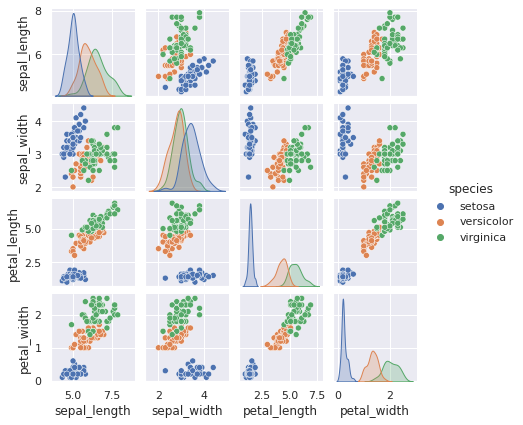

In [188]:
%matplotlib inline
import seaborn as sns;sns.set()
sns.pairplot(iris, hue='species', height=1.5)

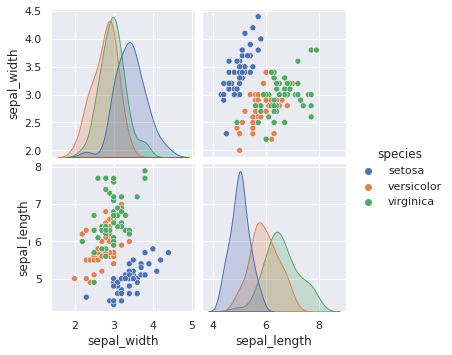

In [189]:
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"], hue='species')

In [190]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

NameError: ignored

In [ ]:
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

In [ ]:
y = mlab.normpdf(bins, mu, sigma)

In [ ]:
l = plt.plot(bins, y, 'r--', linewidth=1)

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()